<a href="https://colab.research.google.com/github/kurzym/assignments/blob/master/Systemy_wyszukiwawcze_Projekt_SMOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zadanie polega na pobraniu wpisów z mediów społecznościowych (np. twitter) dotyczących czystości powietrza (np. #smog),
a następnie przeprowadzeniu analizy tych wpisów. Może to być analiza wydźwięku, aktualności, statystyka miast (które pojawiają się najczęściej, o których najgorzej piszą), pokrycie geograficzne itp. Zadanie na kreatywność.

#SMOG
##czyli gdzie najwięcej się o niego pyta
### Analiza smogu w największych miastach w Polsce, czyli czy tylko w Krakowie jest smog?
##### Projekt zaliczeniowy z Systemów Wyszukiwawczych 
###### Tomasz Szcześniak, Rafał Kurzymski

In [ ]:
#import 
#import os
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import itertools
import collections

import tweepy as tw
#import nltk
#from nltk.corpus import stopwords
import re
#import networkx

#import warnings
#warnings.filterwarnings("ignore")

#sns.set(font_scale=1.5)
#sns.set_style("whitegrid")

In [ ]:
#give access to tokens and keys
access_token="1352942902712872961-cV3VKMBS1jEvZcailz8EfYdLi6Q8Im"
#"Ec5vYvyCq5PQ8zy70yab4hww5" #API key
access_token_secret="Ns5JqxxcntHK9YEZXXxYJ1f92g2iyJi2L8lgAnvlO1Vv5"
#"F8KjdoPUQDKUif6cTyahSkHV8B4WlwUhVFjyG5M08nL70uarsQ" #API secret key
consumer_key="jznhofQgXLGiy8zmimBjgRGAf"
consumer_secret="bMeimrI1PiOzHEJGzXdpprpjC6SVilGT4YatzWt8B6H2GZaP3b"
auth= tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

#Warszawa

wpisz datę od kiedy mają być wyszukiwane dane w formacie yyyy-mm-dd
['RT @airlyorg: #Warsaw - the European capital of smog 😖 #Warszawa #smog #airpollution #airquality Buy an #Airly sensor: https://t.co/inpDEme…', 'RT @airlyorg: #Warsaw - the European capital of smog 😖 #Warszawa #smog #airpollution #airquality Buy an #Airly sensor: https://t.co/inpDEme…', 'RT @airlyorg: #Warsaw - the European capital of smog 😖 #Warszawa #smog #airpollution #airquality Buy an #Airly sensor: https://t.co/inpDEme…']
      words  count
0      smog      6
1        rt      3
2  airlyorg      3
3    warsaw      3
4       the      3


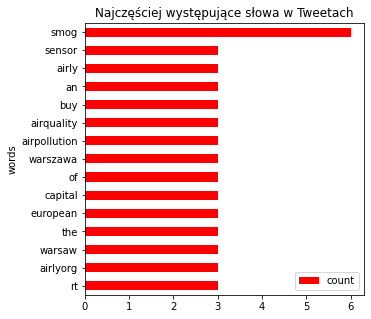

In [ ]:
search_words = "#smog+warsaw" or "smog+warszawa" and "#smog+#warszawa" # "-filter:retweets" niepozwala na retweety i wyszukuje tylko jak występują oba sformułowania
print("wpisz datę od kiedy mają być wyszukiwane dane w formacie yyyy-mm-dd")
date_since = "2020-11-01" #input(str()) #od kiedy ma brać
tweets = tw.Cursor(api.search,
              q=search_words,
              since=date_since).items(100) #100 ostatnich
              


all_tweets = [tweet.text for tweet in tweets]
print(all_tweets)
#create a definition to remove 
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

#use function and delete url
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]


#check words in tweets
if not all_tweets:
  print ("nic nie znaleziono")
else:
  all_tweets_no_urls[0].lower().split()

all_tweets_no_urls[0].lower().split()

words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

#list of words
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)
# creat data frame
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

#show data frame
print(clean_tweets_no_urls.head())
#output to Excel
clean_tweets_no_urls.to_excel("counter.xlsx") 

fig, ax = plt.subplots(figsize=(5,5))

# Creat a bar plot with tweet words
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Najczęściej występujące słowa w Tweetach")

plt.show()

In [ ]:
#Save tweet to file
file1 = open("Tweets.txt","w") 
file1.write("List of Tweets \n") 
file1.writelines(all_tweets) 
file1.close()

#Kraków

wpisz datę od kiedy mają być wyszukiwane dane w formacie yyyy-mm-dd
['#Krakow  Stężenie pyłu #PM10 w ciągu siedmiu lat spadło o ponad 45%. Gorzej sytuacje wygląda na terenie całej Małop… https://t.co/gpLb2Qs1oD', 'Coraz więcej instalacji OZE w Krakowie https://t.co/aT0UrtpSgh #cire #news #oze #kraków #smog', 'RT @krakow_pl: #jakośćpowietrza #smog #niskaemisja W kwestii jakości #krakow.skiego powietrza nadal jest sporo do zrobienia. Jednak program…', '👏🏻 bardzo zły stan powietrza w okolicach Warszawy przez kilka ostatnich dni to codzienność na południu Polski trwaj… https://t.co/vctFtbkO70', 'Smog wawelski powrócił na stare rejony 😐 Trochę odtwórczy żart, ale pasowało nam idealnie ❤️ @AndrzejRysuje… https://t.co/nMxcqzITtN', 'Dzisiaj można nawet Wieżę Mariacką zobaczyć 😍⛪ \n#smog #AirPollution #czystepowietrze #Polska #Kraków https://t.co/LQxtKz2ejU', '@makowski_m Tu tworzy Pan fakt prasowy. Rzeczywiście #smog dusił. #Kraków, co pięknie wyśpiewał #Maanam w Krakowski… https://t.co/nGkj3f

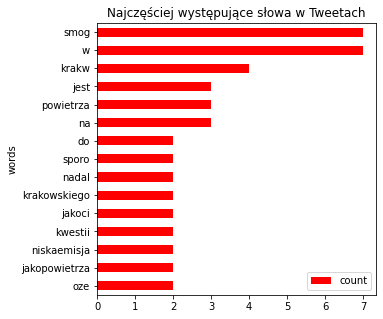

In [ ]:
search_words = "#smog+#cracov" and "#smog+#krakow" and "#smog+#kraków" # "-filter:retweets" niepozwala na retweety i wyszukuje tylko jak występują oba sformułowania
print("wpisz datę od kiedy mają być wyszukiwane dane w formacie yyyy-mm-dd")
date_since = "2020-11-01" #input(str()) #od kiedy ma brać
tweets = tw.Cursor(api.search,
              q=search_words,
              since=date_since).items(100) #100 ostatnich
              


all_tweets = [tweet.text for tweet in tweets]
print(all_tweets)
#create a definition to remove 
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

#use function and delete url
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]



#check words in tweets

if not all_tweets:
  print ("nic nie znaleziono")
else:
  all_tweets_no_urls[0].lower().split()

words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

#list of words
all_words_no_urls = list(itertools.chain(*words_in_tweet))

'''

clean_tweets_no_urls.head()
'''
# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)
# creat data frame
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

#show data frame
print(clean_tweets_no_urls.head())
#output to Excel
clean_tweets_no_urls.to_excel("counter.xlsx") 

fig, ax = plt.subplots(figsize=(5,5))

# Creat a bar plot with tweet words
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Najczęściej występujące słowa w Tweetach")

plt.show()

In [ ]:
f = open('Tweets.txt','a+') # Not using 'with' just to simplify the example REPL session
f.write("\n" + "Kraków")
f.write(str(all_tweets))
f.close()

#Poznań

wpisz datę od kiedy mają być wyszukiwane dane w formacie yyyy-mm-dd
['Radny Andrzej Rataj wskazuje na problem ubóstwa energetycznego i jego wpływu na powstawanie #smog, apeluje  o wprow… https://t.co/4F6XswlI6v', '@MiastoPoznan osiedle warszawskie, kłęby śmierdzącego dymu na porządku dziennym. Jakość powietrza fatalna i nie pot… https://t.co/Em9mD85PeR']
     words  count
0       na      3
1        i      2
2    radny      1
3  andrzej      1
4    rataj      1


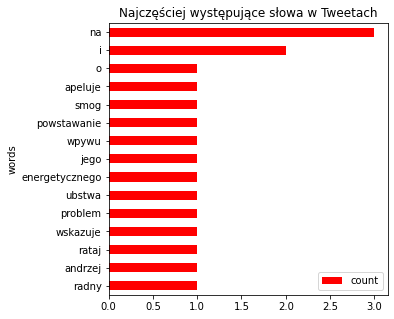

In [ ]:
search_words = "#smog+#poznan" and "#smog+#poznań" and "#smog+#poznań" # "-filter:retweets" niepozwala na retweety i wyszukuje tylko jak występują oba sformułowania
print("wpisz datę od kiedy mają być wyszukiwane dane w formacie yyyy-mm-dd")
date_since = "2020-11-01" #input(str()) #od kiedy ma brać
tweets = tw.Cursor(api.search,
              q=search_words,
              since=date_since).items(100) #100 ostatnich
              


all_tweets = [tweet.text for tweet in tweets]
print(all_tweets)
#create a definition to remove 
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

#use function and delete url
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]



#check words in tweets
if not all_tweets:
  print ("nic nie znaleziono")
else:
  all_tweets_no_urls[0].lower().split()


words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

#list of words
all_words_no_urls = list(itertools.chain(*words_in_tweet))

'''

clean_tweets_no_urls.head()
'''
# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)
# creat data frame
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

#show data frame
print(clean_tweets_no_urls.head())
#output to Excel
clean_tweets_no_urls.to_excel("counter.xlsx") 

fig, ax = plt.subplots(figsize=(5,5))

# Creat a bar plot with tweet words
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Najczęściej występujące słowa w Tweetach")

plt.show()

In [ ]:
f = open('Tweets.txt','a+') # Not using 'with' just to simplify the example REPL session
f.write("\n" + "Poznań")
f.write(str(all_tweets))
f.close()

#Wrocław

In [ ]:
search_words = "#smog+#wroclaw" and "#smog+#wrocław" and "#smog+#wroclove" # "-filter:retweets" niepozwala na retweety i wyszukuje tylko jak występują oba sformułowania
print("wpisz datę od kiedy mają być wyszukiwane dane w formacie yyyy-mm-dd")
date_since = "2020-11-01" #input(str()) #od kiedy ma brać
tweets = tw.Cursor(api.search,
              q=search_words,
              since=date_since).items(100) #100 ostatnich
              


all_tweets = [tweet.text for tweet in tweets]
print(all_tweets)
#create a definition to remove 
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

#use function and delete url
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]

#check words in tweets
a = 0
if not all_tweets:
  print ("nic nie znaleziono")
  a = a + 1
else:
  all_tweets_no_urls[0].lower().split()

words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

#list of words
all_words_no_urls = list(itertools.chain(*words_in_tweet))

'''

clean_tweets_no_urls.head()
'''
# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)
# creat data frame
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

#show data frame
print(clean_tweets_no_urls.head())
#output to Excel
clean_tweets_no_urls.to_excel("counter.xlsx") 



# Creat a bar plot with tweet words
if a == '1':
  fig, ax = plt.subplots(figsize=(5,5))
  clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

  ax.set_title("Najczęściej występujące słowa w Tweetach")

  plt.show()
else:
  print("niestety brak rekodów")

wpisz datę od kiedy mają być wyszukiwane dane w formacie yyyy-mm-dd
[]
nic nie znaleziono
Empty DataFrame
Columns: [words, count]
Index: []
niestety brak rekodów


In [ ]:
f = open('Tweets.txt','a+') # Not using 'with' just to simplify the example REPL session
f.write("\n" + "Wrocław")
f.write(str(all_tweets))
f.close()

#Łódź

In [ ]:
search_words = "#smog+#lodz" and "#smog+#Łódź" and "#smog+#Lodz" # "-filter:retweets" niepozwala na retweety i wyszukuje tylko jak występują oba sformułowania
print("wpisz datę od kiedy mają być wyszukiwane dane w formacie yyyy-mm-dd")
date_since = "2020-11-01" #input(str()) #od kiedy ma brać
tweets = tw.Cursor(api.search,
              q=search_words,
              since=date_since).items(100) #100 ostatnich
              


all_tweets = [tweet.text for tweet in tweets]
print(all_tweets)
#create a definition to remove 
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

#use function and delete url
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]

#check words in tweets
a = 0
if not all_tweets:
  print ("nic nie znaleziono")
  a = 1
else:
  all_tweets_no_urls[0].lower().split()

words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

#list of words
all_words_no_urls = list(itertools.chain(*words_in_tweet))

'''

clean_tweets_no_urls.head()
'''
# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)
# creat data frame
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

#show data frame
print(clean_tweets_no_urls.head())
#output to Excel
clean_tweets_no_urls.to_excel("counter.xlsx") 



# Creat a bar plot with tweet words
if a == '1':
  fig, ax = plt.subplots(figsize=(5,5))
  clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                        y='count',
                        ax=ax,
                        color="red")

  ax.set_title("Najczęściej występujące słowa w Tweetach")

  plt.show()
else:
  print("niestety brak rekodów")

wpisz datę od kiedy mają być wyszukiwane dane w formacie yyyy-mm-dd
[]
nic nie znaleziono
Empty DataFrame
Columns: [words, count]
Index: []
niestety brak rekodów


In [ ]:
f = open('Tweets.txt','a+') # Not using 'with' just to simplify the example REPL session
f.write("\n" + "Łódź")
f.write(str(all_tweets))
f.close()

#samo zapytanie o smog

wpisz datę od kiedy mają być wyszukiwane dane w formacie yyyy-mm-dd
['W Polsce systematycznie rośnie długość sieci ciepłowniczych, ale branża nie spodziewa się wzrostu sprzedaży ciepła… https://t.co/bQUpyjZPst', 'RT @BiznesAlert: Kubica: W walce ze #smog nie chodzi tylko o kotły. Paliwa bezdymne mogą ocalić paliwa stałe https://t.co/9D4RM1nQHv ...', '#Warszawa #Bemowo 2021-01-27 11:00\nTemp: 0.5°C Wilg: 86% Ciśn: 1009.0 hPa\nPM 1.0: 2 μg/m³ (10% normy)\nPM 2.5: 6 μg/… https://t.co/c7PyA33E5B', '#Kobyłka 2021-01-27 11:00\nTemp: 1.5°C\nWilg: 85% Ciśn: 1003.0 hPa\nPM 2.5: 5.3 μg/m³ \nPM 10: 8.1 μg/m³ \n#smog\n https://t.co/tVUEAwvaFb', '04:46 EnvCanada ended warning #Smog #AQ #SaintNicéphore #QCStorm https://t.co/GFMjk6fX80', '04:46 EnvCanada ended warning #Smog #AQ #SaintGeorges #QCStorm https://t.co/7gtikNXNuD', '04:46 EnvCanada ended warning #Smog #AQ #Lévis #QCStorm https://t.co/6aPa7If5Iq', '04:46 EnvCanada ended warning #Smog #AQ #LIslet #QCStorm https://t.co/EpGj8CjDDX', '04:46 Env

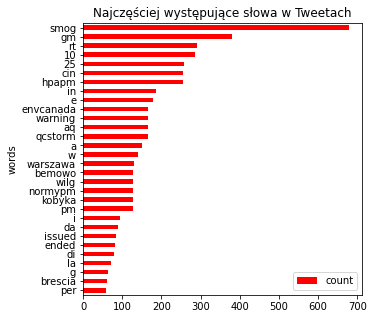

In [ ]:
search_words = "#smog" # "-filter:retweets" niepozwala na retweety i wyszukuje tylko jak występują oba sformułowania
print("wpisz datę od kiedy mają być wyszukiwane dane w formacie yyyy-mm-dd")
date_since = "2021-01-01" #input(str()) #od kiedy ma brać
tweets = tw.Cursor(api.search,
              q=search_words,
              since=date_since).items(1000) #100 ostatnich
              


all_tweets = [tweet.text for tweet in tweets]
print(all_tweets)
#create a definition to remove 
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

#use function and delete url
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]

#set(lower_case)


#check words in tweets
if not all_tweets:
  print ("nic nie znaleziono")
else:
  all_tweets_no_urls[0].lower().split()

words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

#list of words
all_words_no_urls = list(itertools.chain(*words_in_tweet))

'''

clean_tweets_no_urls.head()
'''
# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(20)
# creat data frame
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(30),
                             columns=['words', 'count'])

#show data frame
print(clean_tweets_no_urls.head())
#output to Excel
clean_tweets_no_urls.to_excel("counter.xlsx") 

fig, ax = plt.subplots(figsize=(5,5))

# Creat a bar plot with tweet words
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Najczęściej występujące słowa w Tweetach")

plt.show()

#Analiza danych

#Dane

In [56]:
import pandas as pd
import numpy as np
# połączenie z Google Drive
#from google.colab import drive
#drive.mount('/content/drive/')
#excel_file = pd.read_excel('/content/drive/MyDrive/studia/sys/iqair.xlsx',index_col = 0)
#Dodanie pliku do analizy
excel_file = '2021_analiza_smogu.xlsx'
dane_smog = pd.read_excel(excel_file, index_col=0)
dane_smog
#Przypisanie kategorii w zależności od danych
dane_smog['Category_2019'] =np.where(dane_smog['średnia_2019'] <=16.0, "Good",np.where(dane_smog['średnia_2019'] >=20.0, "Bad","Moderate"))
dane_smog['Category_2019_01'] =np.where(dane_smog['Styczeń'] <=10.0, "WHO target",np.where(dane_smog['Styczeń'] <=12.0, "Good",np.where(dane_smog['Styczeń'] <=35.4, "Moderate",np.where(dane_smog['Styczeń'] <=55.4, "Unhealthy for sensitive groups","Unhealthy"))))
#dane_smog.head()
dane_smog


,Miasto,Styczeń,Luty,Marzec,Kwiecień,Maj,Czerwiec,Lipiec,Sierpień,Wrzesień,Październik,Listopad,Grudzień,średnia_2019,średnia_2018,średnia_2017,Category_2019,Category_2019_01
WRO,Wrocław,29.6,30.8,19.1,21.2,13.3,12.4,10.6,10.7,12.1,19.1,23.6,23.5,18.7,22.9,21.9,Moderate,Moderate
BYD,Bydgoszcz,30.7,31.7,16.9,20.7,15.4,20.0,12.9,19.1,15.6,23.6,27.0,25.9,21.7,24.2,20.7,Bad,Moderate
TOR,Toruń,31.4,30.5,18.4,21.8,14.5,13.7,8.8,11.5,14.1,19.5,23.0,20.2,19.1,19.4,19.3,Moderate,Moderate
LUB,Lublin,34.1,29.4,20.6,21.0,12.4,9.6,13.3,12.1,14.1,26.1,23.2,24.2,20.5,21,21.6,Bad,Moderate
GW,Gorzów Wielkopolski,26.5,31.3,16.4,19.2,10.7,11.6,9.0,10.4,10.2,18.8,24.8,24.4,17.7,16.9,15.3,Moderate,Moderate
ZG,Zielona Góra,20.7,21.3,12.3,14.2,8.8,10.7,9.2,10.3,9.2,14.4,19.4,18.3,13.8,16.9,15.3,Good,Moderate
LOD,Łódź,34.1,32.3,20.8,19.5,13.1,12.5,9.7,11.9,13.4,22.5,24.6,26.4,19.9,23.8,23.3,Moderate,Moderate
KRK,Kraków,37.0,42.0,27.0,23.7,15.5,14.3,12.5,14.8,15.6,26.4,33.2,35.1,24.6,28.9,30.2,Bad,Unhealthy for sensitive groups
WWA,Warszawa,32.2,29.5,18.7,21.9,14.2,11.9,9.1,11.5,13.5,23.3,24.5,24.1,19.3,-,-,Moderate,Moderate
OPO,Opole,48.2,43.3,25.5,27.2,12.9,12.8,10.6,11.9,11.1,20.1,22.6,23.8,19.8,29,29.8,Moderate,Unhealthy for sensitive groups


In [57]:
sort_by_2019 =dane_smog.sort_values(['średnia_2019'], ascending = False)
sort_by_2019['średnia_2019']

KAT    26.0
KRK    24.6
BYD    21.7
LUB    20.5
POZ    20.4
KIE    20.1
LOD    19.9
OPO    19.8
RZE    19.8
WWA    19.3
TOR    19.1
WRO    18.7
GW     17.7
SZC    15.6
OLS    15.5
GDA    14.2
ZG     13.8
BIA    13.7
Name: średnia_2019, dtype: float64

Wykres pokazujący średnie stężenie pyłu PM2.5 w miastach wojewódzkich w 2019 roku

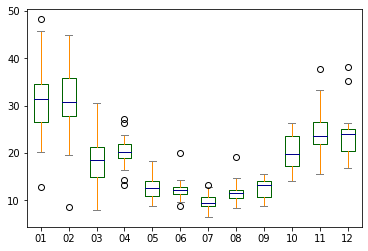

In [58]:
import matplotlib.pyplot as plt
boxplot_m =pd.DataFrame(dane_smog, columns=["Styczeń","Luty","Marzec","Kwiecień","Maj","Czerwiec","Lipiec","Sierpień","Wrzesień","Październik","Listopad","Grudzień"])
miesiace =boxplot_m.rename(columns={"Styczeń": '01',"Luty": '02',"Marzec": '03',"Kwiecień":'04',"Maj":'05',"Czerwiec":'06',"Lipiec": '07',"Sierpień":'08',"Wrzesień":'09',"Październik":'10',"Listopad":'11',"Grudzień":'12'})
color ={"boxes": "Darkgreen",
"whiskers": "DarkOrange",
"medians": "DarkBlue",
"caps": "Gray"}

miesiace.plot.box(color=color);



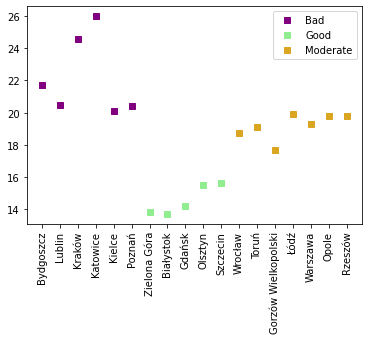

In [ ]:
z=0
groups = dane_smog.groupby("Category_2019")
colors= ['Purple','Goldenrod','lightgreen']
for name, group in groups:
    if name=='Bad': z=0;
    elif name=='Moderate': z=1;
    else: z=2;
    plt.plot(group["Miasto"], group["średnia_2019"], marker="s", linestyle="", label=name, color=colors[z])
plt.xticks(rotation=90)
plt.legend()


Wykres przedstawia stężenie pyłu PM2.5 w poszczególnych miesiącach 2019 roku


In [ ]:
import plotly.express as px
fig=px.bar(dane_smog, x="Miasto", y='średnia_2019', labels={
                     "Miasto": "Miasta wojewódzkie",
                     "średnia_2019": "Stężenie pyłu PM2.5",
                     "Category_2019": "Kategoria"
                 }, height=650, hover_name="Miasto",color_discrete_map={
                "Moderate": "goldenrod",
                "Good": "lightgreen",
                "Bad": "purple"
             },title="Stężenie pyłu PM 2.5 w miastach wojewódzkich w 2019 roku", color="Category_2019")
fig.show()

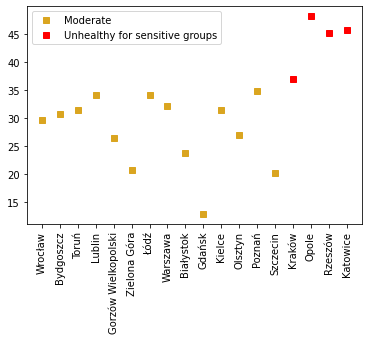

In [59]:
z=0
groups = dane_smog.groupby("Category_2019_01")
colors= ['Purple','Goldenrod','lightgreen','lightblue','lightred','red']
for name, group in groups:
    if name=='Bad': z=0;
    elif name=='Moderate': z=1;
    elif name=='Good': z=2;
    elif name=='WHO target': z=3;
    elif name=='Unhealthy': z=4;
    else: z=5;
    plt.plot(group["Miasto"], group["Styczeń"], marker="s", linestyle="", label=name, color=colors[z])
plt.xticks(rotation=90)
plt.legend()

#Porównywarka

In [60]:
miasta_liczba = int(input("Podaj liczbę miast do porównania: ")) 
miasta =[]
for i in range(miasta_liczba):
    c = str(input("Podaj nazwę miasta: "))
    if c == "Warszawa" or c == "Poznań" or c == "Łódź" or c == "Wrocław" or c == "Gdańsk" or c == "Zielona Góra" or c == "Toruń" or c == "Szczecin" or c == "Rzeszów" or c == "Opole" or c == "Olsztyn" or c == "Lublin" or c == "Kraków" or c == "Gorzów Wielkopolski" or c == "Katowice" or c == "Kielce" or c == "Bydgoszcz" or c == "Białystok":  
      miasta.append(c)
    else:
      print("Miasto nie jest wojewódzkie")
print(miasta)

Podaj liczbę miast do porównania: 2
Podaj nazwę miasta: Warszawa
Podaj nazwę miasta: Poznań
['Warszawa', 'Poznań']


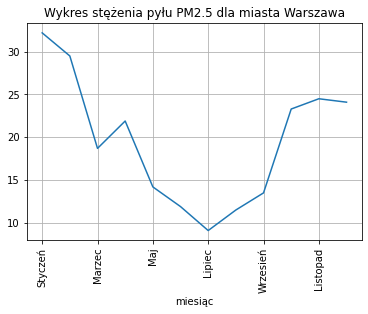

Średnia wartość stężenia pyłu, liczona w µg/m³ dla miasta Warszawa w 2019 roku wynosiła 19.3.
Największa wartość, która miała miejsce w styczniu to 32.2, a najniższa mająca miejsce w lipcu to 9.1.


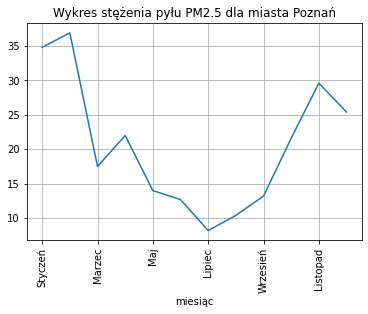

Średnia wartość stężenia pyłu, liczona w µg/m³ dla miasta Poznań w 2019 roku wynosiła 20.4.
Największa wartość, która miała miejsce w lutym to 36.9, a najniższa mająca miejsce w lipcu to 8.2.


In [61]:
#Tworzy wykresy PM 2.5 dla wybranych miast
for i in miasta:
  m = dane_smog[dane_smog['Miasto']== i] 
  srednia = float(m['średnia_2019'].values)
  max = float(m.max(axis=1))
  min =float(m.min(axis=1))
  v01 = float(m['Styczeń'].values)
  v02 =float(m['Luty'].values)
  v03 = float(m['Marzec'].values)
  v04 =float(m['Kwiecień'].values)
  v05 = float(m['Maj'].values)
  v06 =float(m['Czerwiec'].values)
  v07 = float(m['Lipiec'].values)
  v08 =float(m['Sierpień'].values)
  v09 = float(m['Wrzesień'].values)
  v10 =float(m['Październik'].values)
  v11 = float(m['Listopad'].values)
  v12 =float(m['Grudzień'].values)
  if v01==max: max_miesiac ='styczniu'
  elif v02==max: max_miesiac ='lutym'
  elif v03==max: max_miesiac ='marcu'
  elif v04==max: max_miesiac ='kwietniu'
  elif v05==max: max_miesiac ='maju'
  elif v06==max: max_miesiac ='czerwcu'
  elif v07==max: max_miesiac ='lipcu'
  elif v08==max: max_miesiac ='sierpniu'
  elif v09==max: max_miesiac ='wrześniu'
  elif v10==max: max_miesiac ='październiku'
  elif v11==max: max_miesiac ='listopadzie'
  elif v12==max: max_miesiac ='grudniu'

  if v01==min: min_miesiac ='styczniu'
  elif v02==min: min_miesiac ='lutym'
  elif v03==min: min_miesiac ='marcu'
  elif v04==min: min_miesiac ='kwietniu'
  elif v05==min: min_miesiac ='maju'
  elif v06==min: min_miesiac ='czerwcu'
  elif v07==min: min_miesiac ='lipcu'
  elif v08==min: min_miesiac ='sierpniu'
  elif v09==min: min_miesiac ='wrześniu'
  elif v10==min: min_miesiac ='październiku'
  elif v11==min: min_miesiac ='listopadzie'
  elif v12==min: min_miesiac ='grudniu'

  dane_wykres = pd.DataFrame({"PM2.5": [v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,v11,v12],
                              "miesiąc": ["Styczeń","Luty","Marzec","Kwiecień","Maj","Czerwiec","Lipiec","Sierpień","Wrzesień","Październik","Listopad","Grudzień"]})
  dane_wykres.plot(x="miesiąc",y="PM2.5", grid=True, title=f"Wykres stężenia pyłu PM2.5 dla miasta {i}", legend=False)
  plt.xticks(rotation=90)
  plt.show()
  if v01 >60: z+=1
  print(f"Średnia wartość stężenia pyłu, liczona w µg/m³ dla miasta {i} w 2019 roku wynosiła {srednia}.\nNajwiększa wartość, która miała miejsce w {max_miesiac} to {max}, a najniższa mająca miejsce w {min_miesiac} to {min}.")


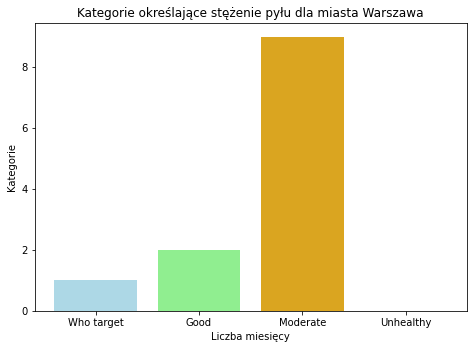

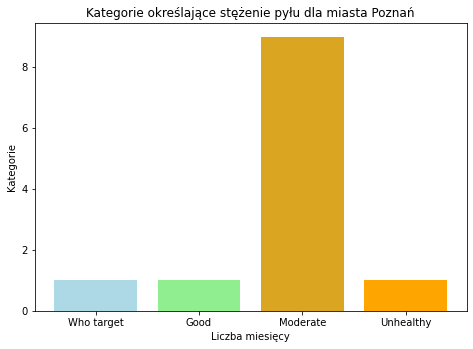

In [62]:
#kategoryzuje wybrane miasta  w zależności od kategorii
who_target =10
good =12
moderate =35.4
unhealthy =55.4
for i in miasta:
  cat_1=0
  cat_2=0
  cat_3=0
  cat_4=0
  m = dane_smog[dane_smog['Miasto']== i] #tutaj Warszawa trzeba zamienić żeby nazwę pobierał z listy
  
  srednia = float(m['średnia_2019'].values)
  max = float(m.max(axis=1))
  min =float(m.min(axis=1))
  v01 = float(m['Styczeń'].values)
  v02 =float(m['Luty'].values)
  v03 = float(m['Marzec'].values)
  v04 =float(m['Kwiecień'].values)
  v05 = float(m['Maj'].values)
  v06 =float(m['Czerwiec'].values)
  v07 = float(m['Lipiec'].values)
  v08 =float(m['Sierpień'].values)
  v09 = float(m['Wrzesień'].values)
  v10 =float(m['Październik'].values)
  v11 = float(m['Listopad'].values)
  v12 =float(m['Grudzień'].values)

  if v01 <=who_target: cat_1+=1
  elif v01 <=good: cat_2+=1
  elif v01 <=moderate: cat_3+=1
  else: cat_4+=1

  if v02 <=who_target: cat_1+=1
  elif v02 <=good: cat_2+=1
  elif v02 <=moderate: cat_3+=1
  else: cat_4+=1

  if v03 <=who_target: cat_1+=1
  elif v03 <=good: cat_2+=1
  elif v03 <=moderate: cat_3+=1
  else: cat_4+=1

  if v04 <=who_target: cat_1+=1
  elif v04 <=good: cat_2+=1
  elif v04 <=moderate: cat_3+=1
  else: cat_4+=1

  if v05 <=who_target: cat_1+=1
  elif v05 <=good: cat_2+=1
  elif v05 <=moderate: cat_3+=1
  else: cat_4+=1

  if v06 <=who_target: cat_1+=1
  elif v06 <=good: cat_2+=1
  elif v06 <=moderate: cat_3+=1
  else: cat_4+=1

  if v07 <=who_target: cat_1+=1
  elif v07 <=good: cat_2+=1
  elif v07 <=moderate: cat_3+=1
  else: cat_4+=1

  if v08 <=who_target: cat_1+=1
  elif v08 <=good: cat_2+=1
  elif v08 <=moderate: cat_3+=1
  else: cat_4+=1

  if v09 <=who_target: cat_1+=1
  elif v09 <=good: cat_2+=1
  elif v09 <=moderate: cat_3+=1
  else: cat_4+=1

  if v10 <=who_target: cat_1+=1
  elif v10 <=good: cat_2+=1
  elif v10 <=moderate: cat_3+=1
  else: cat_4+=1

  if v11 <=who_target: cat_1+=1
  elif v11 <=good: cat_2+=1
  elif v11 <=moderate: cat_3+=1
  else: cat_4+=1

  if v12 <=who_target: cat_1+=1
  elif v12 <=good: cat_2+=1
  elif v12 <=moderate: cat_3+=1
  else: cat_4+=1

  fig =plt.figure()
  ax=fig.add_axes([0,0,1,1])
  kategorie =['Who target','Good','Moderate','Unhealthy']
  colors= ['Lightblue','Lightgreen','Goldenrod','orange']
  kat_wartosci=[cat_1,cat_2,cat_3,cat_4]
  ax.bar(kategorie,kat_wartosci, color=colors)
  ax.set_title(f"Kategorie określające stężenie pyłu dla miasta {i}")
  ax.set_ylabel('Kategorie')
  ax.set_xlabel('Liczba miesięcy')
  plt.show()

Podsumowanie / Wnioski
Sytuacja w miastach wojewódzkich pod kątem analizy smogu jest zróżnicowana
Kraków jest jednym z najgorszych miast pod względem powietrza, ale w większości miast nie jest ono dobre (WHO_target). Miasta powinny podjąć działania zapobiegawcze. Co roku z powodu zanieczyszczenia powietrza ginie ok. 7mln osób. Przekładając to na nasze otoczenie, jest to około 900 osób z aglomeracji poznańskiej rocznie.